## Importing Libraries and Set Up

After cleaning up the dataframes in the Cleaning Notebook, I conducted EDA in this notebook. I made some additions to the cleaning notebook throughout the EDA process as I found additional items to clean out.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV

# pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)

In [2]:
# load cleaned datasets
train_eda = pd.read_csv('../3 Data_Files/clean_train.csv')
test_eda = pd.read_csv('../3 Data_Files/clean_test.csv')

In [3]:
train_eda.shape

(2034, 82)

In [4]:
test_eda.shape

(878, 81)

In [5]:
# Check to see what column is different 
set(train_eda) - set(test_eda)

{'SalePrice'}

In [6]:
train_eda.isnull().sum()

Id                            0
PID                           0
MS SubClass                   0
MS Zoning                     0
Lot Frontage                  0
                             ..
Mo Sold                       0
Yr Sold                       0
Sale Type                     0
SalePrice                     0
Exter Qual and Gr Liv Area    0
Length: 82, dtype: int64

In [7]:
test_eda.isnull().sum()

Id                            0
PID                           0
MS SubClass                   0
MS Zoning                     0
Lot Frontage                  0
                             ..
Misc Val                      0
Mo Sold                       0
Yr Sold                       0
Sale Type                     0
Exter Qual and Gr Liv Area    0
Length: 81, dtype: int64

In [8]:
train_eda.dtypes

Id                              int64
PID                             int64
MS SubClass                     int64
MS Zoning                      object
Lot Frontage                  float64
                               ...   
Mo Sold                         int64
Yr Sold                         int64
Sale Type                      object
SalePrice                       int64
Exter Qual and Gr Liv Area      int64
Length: 82, dtype: object

In [9]:
test_eda.dtypes

Id                              int64
PID                             int64
MS SubClass                     int64
MS Zoning                      object
Lot Frontage                  float64
                               ...   
Misc Val                        int64
Mo Sold                         int64
Yr Sold                         int64
Sale Type                      object
Exter Qual and Gr Liv Area      int64
Length: 81, dtype: object

## Doing some visualizations to isolate outliears

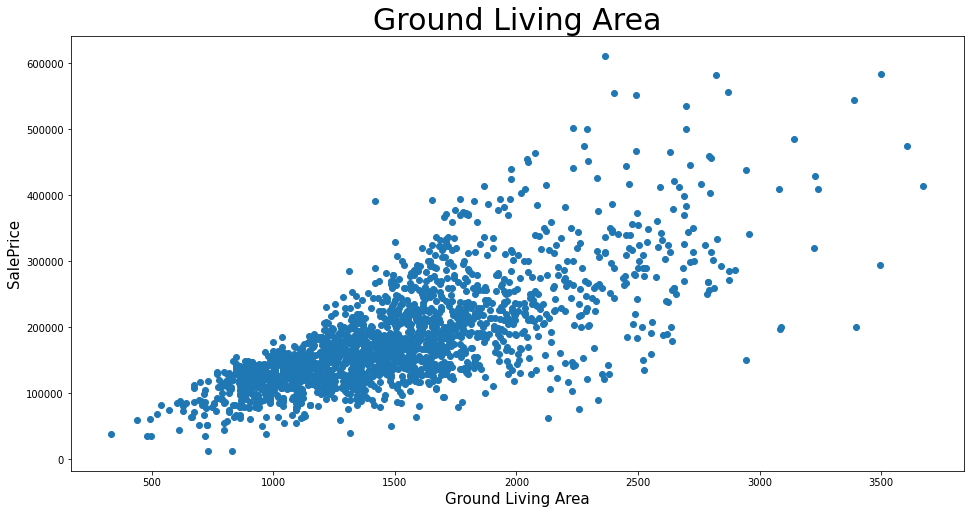

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(train_eda['Gr Liv Area'], train_eda['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Ground Living Area', fontsize=15)
plt.title('Ground Living Area', fontsize= 30);

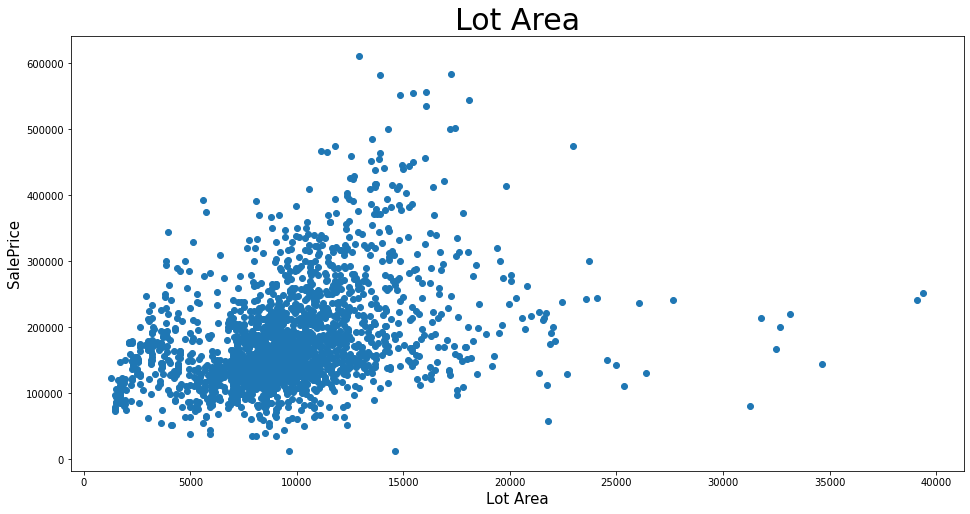

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train_eda['Lot Area'], train_eda['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Lot Area', fontsize=15)
plt.title('Lot Area', fontsize= 30);

In [47]:
train_eda.head(1)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,House Style_2Story,House Style_SLvl,Garage Type_0,Garage Type_2Types,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,OvQual + BsmtFinSF1,super
0,109,533352170,60,0.0,13517,Pave,0,3,Lvl,4,...,1,0,0,0,1,0,0,0,3198.0,18919368.0


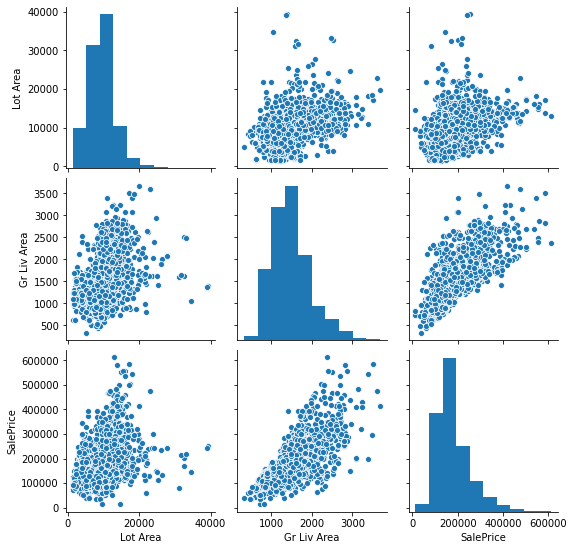

In [13]:
# pairplots to check relationship of lot area, living area and saleprice
sns.pairplot(train_eda[['Lot Area', 'Gr Liv Area', 'SalePrice']])

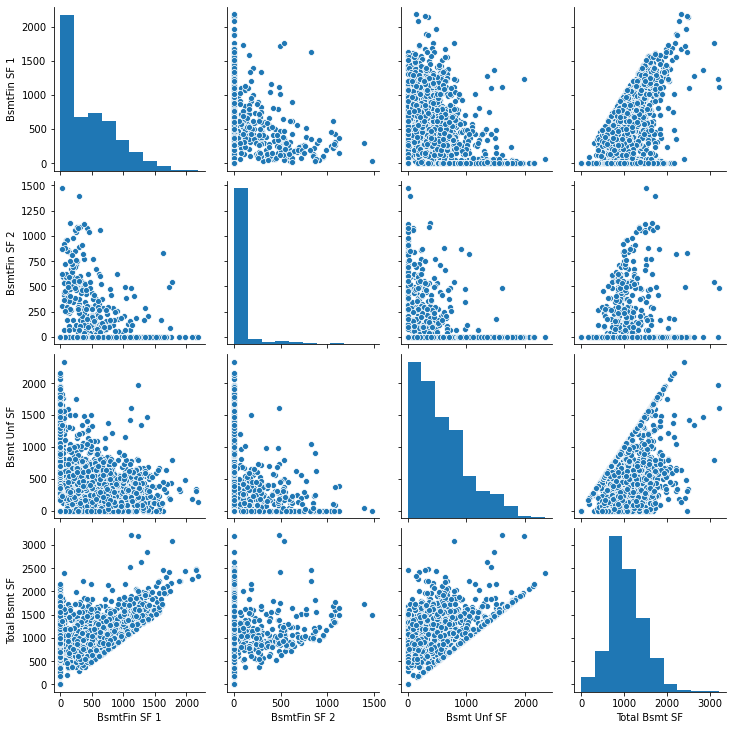

In [14]:
# pairplots to check relationship of Bsmt features
sns.pairplot(train_eda[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']])

## Feature Engineering 

### Created a function that would output a readable version of all of the unique values and value counts for each column.

In [15]:
def columns_values(dataframe):
    for n in dataframe.columns:                               # cycle through the columns in dataframe
        column = n  
        value_counts = (dataframe[column].value_counts())     # run value counts for each column
        unique_values = (dataframe[column].unique())          # run unique values for each column 
        len_counts = len(value_counts)                        # how many items are counted in value counts
        len_unique = len(unique_values)                       # how many items are counted in unique values
        if (len(value_counts)< 100):                          # ignore columns where counts over 100
                print(f"{column} has length of {len_unique}") # print how many unique values there are
                print(unique_values)                          # print unique values for column 
                print("="*30)                                  
                print(f"{column} has length of {len_counts}") # print how many values are counted
                print(value_counts)                           # print unique values counted
                print("="*60)

In [16]:
columns_values(train_eda)

MS SubClass has length of 16
[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
MS SubClass has length of 16
20     759
60     390
50     197
120    132
30     101
70      90
160     88
80      86
90      75
190     45
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64
MS Zoning has length of 7
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
MS Zoning has length of 7
RL         1581
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Street has length of 2
['Pave' 'Grvl']
Street has length of 2
Pave    2027
Grvl       7
Name: Street, dtype: int64
Alley has length of 3
['0' 'Pave' 'Grvl']
Alley has length of 3
0       1894
Grvl      85
Pave      55
Name: Alley, dtype: int64
Lot Shape has length of 4
[3 4 2 1]
Lot Shape has length of 4
4    1294
3     682
2      50
1       8
Name: Lot Shape, dtype: int64
Land Contour has length of 4
['Lvl' 'HLS' 'Bnk

Garage Cond has length of 6
[3 2 0 1 4 5]
Garage Cond has length of 6
3    1851
0     114
2      47
4      12
1       8
5       2
Name: Garage Cond, dtype: int64
Paved Drive has length of 3
[3 1 2]
Paved Drive has length of 3
3    1847
1     148
2      39
Name: Paved Drive, dtype: int64
3Ssn Porch has length of 22
[  0 176 224 162 168 120 407 144 150 255 508 180 140  96 323 153  86 216
 245 182 290 304]
3Ssn Porch has length of 22
0      2008
153       3
168       3
144       2
407       1
86        1
96        1
120       1
140       1
150       1
162       1
508       1
180       1
182       1
216       1
224       1
245       1
255       1
290       1
304       1
323       1
176       1
Name: 3Ssn Porch, dtype: int64
Screen Porch has length of 99
[  0 288 216 440 140 182 385 100 104 168 120 189 144 126 224 201 252 348
 147 192  53 260 164 143 342 150 108  94  92 156 130 145 233 122 111 196
 225 227  90 322 110 255 270 200 291 112 116 155 162 195 174 266 163 142
 480 175 152 410 153 

In [17]:
## DUMMIFY SELECTED COLUMNS
train_eda = pd.get_dummies(train_eda, columns = ['MS Zoning', 'Lot Config', 'House Style','Garage Type'])
test_eda = pd.get_dummies(test_eda, columns = ['MS Zoning', 'Lot Config', 'House Style','Garage Type'])

In [18]:
## DROP SELECTED DUMMY COLUMNS
train_eda.drop([ 'MS Zoning_RH', 'Lot Config_Corner', 'House Style_SFoyer', 'Garage Type_Basment'], axis=1, inplace=True)
test_eda.drop([ 'MS Zoning_RH', 'Lot Config_Corner', 'House Style_SFoyer', 'Garage Type_Basment'], axis=1, inplace=True)

In [19]:
train_eda.shape

(2034, 101)

In [20]:
test_eda.shape

(878, 99)

In [21]:
# check for different columns
set(train_eda) - set(test_eda)

{'MS Zoning_A (agr)', 'SalePrice'}

In [22]:
#getting rid of extra column created during dummies
train_eda.drop(['MS Zoning_A (agr)'], axis=1, inplace=True)

In [23]:
set(train_eda) - set(test_eda)

{'SalePrice'}

## Preprocessing and Modeling

In [24]:
## SETTING THE FEATURES AND TARGET, AND CREATING THE TRAIN TEST SPLIT TO BE USED IN MODELING

features = train_eda.columns.drop(['SalePrice', 'Neighborhood', 'Street', 'Alley', 'Land Contour', 'Condition 1', 'Condition 2', 'Bldg Type', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Misc Feature', 'Sale Type'])
X = train_eda[features]
y = train_eda['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [25]:
# CREATING THE BASELINE

y_train_baseline = [y_train.mean()]*len(y_train)
y_test_baseline  = [y_train.mean()]*len(y_test)
print(f"Base Training RMSE: {mean_squared_error(y_train, y_train_baseline)**0.5}")
print(f"Base Testing RMSE: {mean_squared_error(y_test, y_test_baseline)**0.5}")

Base Training RMSE: 76251.97791669665
Base Testing RMSE: 83643.57963247962


In [26]:
## STANDARDIZING THE SCALE OF OUR FEATURES

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [27]:
## RIDGE REGULARIZATION

ridge = Ridge(alpha=10.0)
ridge.fit(Z_train, y_train)
print(f"Ridge Training Score: {ridge.score(Z_train, y_train)}")
print(f"Ridge Testing Score: {ridge.score(Z_test, y_test)}")

Ridge Training Score: 0.9173399427327222
Ridge Testing Score: 0.9067346265353968


In [28]:
## LASSO REGULARIZATION, I tried to use LASSO to predict for my kaggle submission however was unable to get
## the predictions to work properly

l_alphas = np.logspace(0, 10, 100)
lasso_cv = LassoCV(alphas=l_alphas, cv=5)
lasso_cv.fit(Z_train, y_train)
print(f"LASSO Training Score: {lasso_cv.score(Z_train, y_train)}")
print(f"LASSO Testing Score: {lasso_cv.score(Z_test, y_test)}")

LASSO Training Score: 0.9189538069993975
LASSO Testing Score: 0.9094121900649514


In [29]:
# RUNNING COEFFICIENTS FOR EACH OF THE FEATURES, AND CREATING A DATAFRAME TO READ THEM 
lasso_coef = lasso_cv.coef_
coef_df = pd.DataFrame({
    'column': X.columns,
    'coef'  : lasso_coef
})

In [30]:
# SETTING THE COEFFICIENT VALUES TO ABSOLUTE VALUES
coef_df['coef'] = (abs(coef_df['coef']))

In [31]:
# SORTING THE COEFFICIENTS BY VALUE
coef_df.sort_values(by = 'coef', ascending = False)

,column,coef
60,Exter Qual and Gr Liv Area,75857.689890
30,Gr Liv Area,27018.349645
13,Exter Qual,22736.895959
8,Overall Qual,11540.468093
19,BsmtFin SF 1,8407.264712
...,...,...
42,Garage Yr Blt,0.000000
34,Half Bath,0.000000
22,Bsmt Unf SF,0.000000
27,1st Flr SF,0.000000


In [32]:
# CREATING A NEW FEATURE COLUMN IN TRAINING SET WITH OVERALL QUALITY AND BSMT 1 SQ FT
train_eda['OvQual + BsmtFinSF1'] = train_eda['Overall Qual'] * train_eda['BsmtFin SF 1']

In [33]:
# CREATING A NEW FEATURE COLUMN IN TEST SET WITH OVERALL QUALITY AND BSMT 1 SQ FT
test_eda['OvQual + BsmtFinSF1'] = test_eda['Overall Qual'] * test_eda['BsmtFin SF 1']

In [34]:
# CREATING A NEW FEATURE COLUMN IN TRAINING SET WITH THE TWO FEATURE COLUMNS PREVIOUSLY MADE

train_eda['super'] = train_eda['OvQual + BsmtFinSF1'] * train_eda['Exter Qual and Gr Liv Area']

In [35]:
# CREATING A NEW FEATURE COLUMN IN TEST SET WITH THE TWO FEATURE COLUMNS PREVIOUSLY MADE
test_eda['super'] = test_eda['OvQual + BsmtFinSF1'] * test_eda['Exter Qual and Gr Liv Area']

In [36]:
# CREATING A SECOND SET OF FEATURES TO USE

features2 = train_eda.columns.drop(['SalePrice', 'Neighborhood', 'Street', 'Alley', 'Land Contour', 'Condition 1', 'Condition 2', 'Bldg Type', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Misc Feature', 'Sale Type', 'Garage Yr Blt', 'Bsmt Unf SF', 'Central Air', 'Garage Type_Attchd', '1st Flr SF', 'Half Bath', 'Garage Cond', 'House Style_2Story', 'MS Zoning_I (all)', 'Misc Val', 'Open Porch SF', 'PID'])


In [37]:
# INSTANTIATING, FITTING AND CREATING PREDICTIONS WITH THE NEW FEATURE SET
lr = LinearRegression()
X = train_eda[features2]
y = train_eda['SalePrice']
lr.fit(X,y)
lr.intercept_
lr.coef_
y_preds = lr.predict(X)
resids = y - y_preds


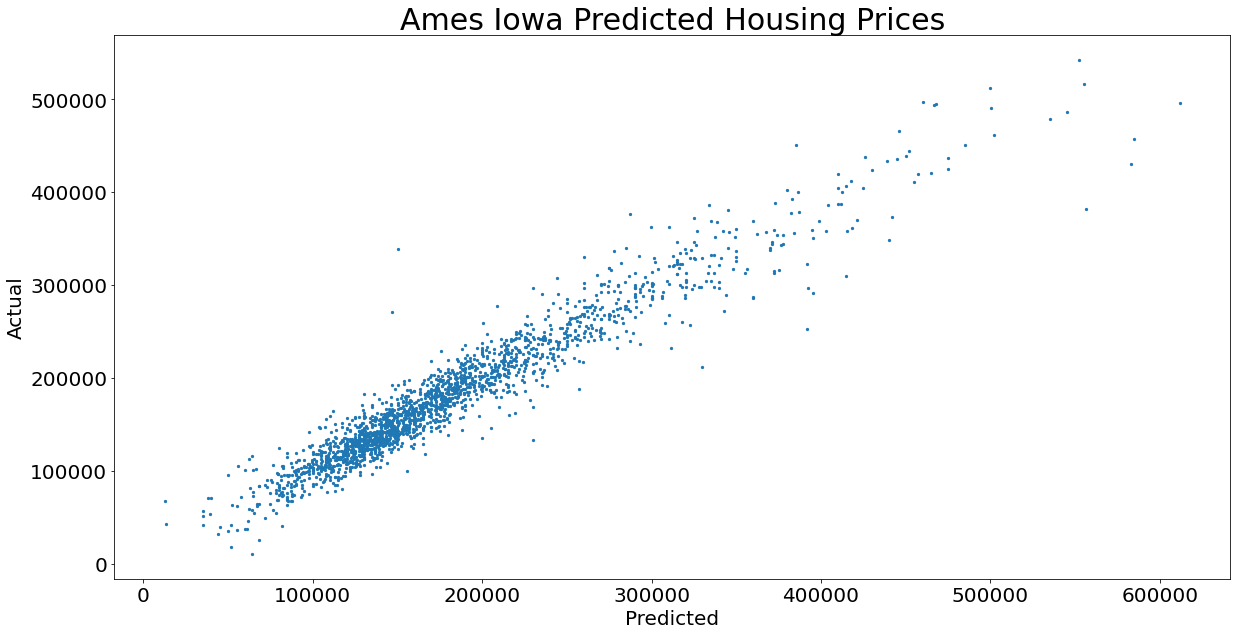

In [38]:
# PLOTTING THE PREDICTED PRICES
plt.figure(figsize=(20,10))
plt.scatter(train_eda['SalePrice'], lr.predict(X), s=5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.title('Ames Iowa Predicted Housing Prices', fontsize=30);

In [39]:
from sklearn import metrics

### Created a function that would output Linear Regression Metrics for the model.

In [40]:
def return_reg_metrics(X, y):
    lr = LinearRegression()              # instantiate Linear Regression
    lr.fit(X, y)                         # fit linear regression model
    preds = lr.predict(X)                # create predictions
    resids = y - preds                   # create residuals
    sse = (resids**2).sum()              # create SSE
    null_pred = y.mean()                 # create null predictions
    null_resids = y - null_pred          # create null residuals
    null_sse = (null_resids**2).sum()    # create null sse
    
    ## Print SSE, MSE, RMSE, and R2 Scores
    print("The SSE = " + str((resids**2).sum()))
    print("The MSE = " + str(metrics.mean_squared_error(y, preds)))
    print("The RMSE = " + str((metrics.mean_squared_error(y, preds, squared=False))))
    print("The R2 = " + str((metrics.r2_score(y, preds))))
    
    # Create Formula and Print out Adjusted R2 Score
    n = len(X)
    k = len(features)
    r2 = 1 - (sse/null_sse)
    r2adj_top = ((1 - r2)*(n - 1))
    r2adj_bot = (n - k - 1)
    r2adj = 1- (r2adj_top / r2adj_bot)
    print("The R2ADJ = " + str((r2adj)))

In [41]:
return_reg_metrics(X, y)

The SSE = 937803476827.9298
The MSE = 461063656.25758594
The RMSE = 21472.392886159334
The R2 = 0.9245340517376995
The R2ADJ = 0.9213219113757657


### Kaggle Submission

In [42]:
# setting the features for Kaggle Submission
X_kaggle = test_eda[features2]

In [43]:
# creating predictions for Kaggle Submission
X_kaggle['SalePrice'] = lr.predict(X_kaggle)

/Users/chrisjohnson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
# creating dataframe for Kaggle Submission
output = X_kaggle[['SalePrice']]

In [45]:
# check to make sure the shape meets requirements
output.shape

(878, 1)

In [46]:
# create CSV for Kaggle Submission
output.to_csv('../3 Data_Files/third_submissionc.csv')